# Titanic

In [33]:
%matplotlib inline

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

##Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

### Loading and check data

In [35]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
trainId=train["PassengerId"]
testId=test["PassengerId"]
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [36]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [37]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 97.2+ KB


In [39]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [40]:
df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


### Feature analysis

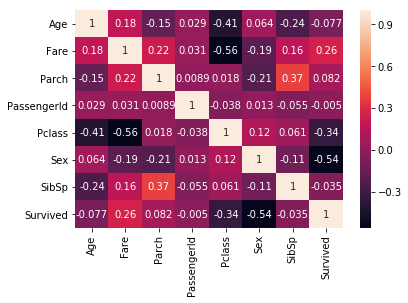

In [52]:
sns.heatmap(df.corr(),annot=True);plt.show()

#### Sex

In [82]:
df["Sex"]=df["Sex"].map({"male":1,"female":0,1:1,0:0}).values

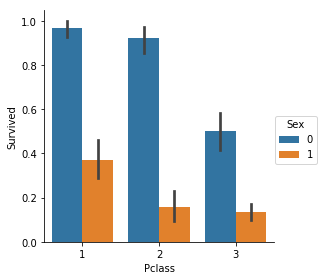

In [56]:
sns.factorplot(x="Pclass",y="Survived",hue="Sex",data=df,kind="bar")

#### Pclass

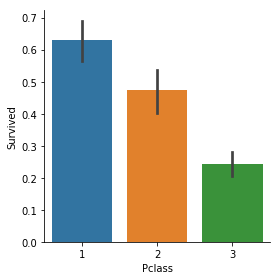

In [75]:
sns.factorplot(x="Pclass",y="Survived",data=df,kind="bar")

#### Fare

In [18]:
df["Fare"]=df["Fare"].fillna(df["Fare"].median())

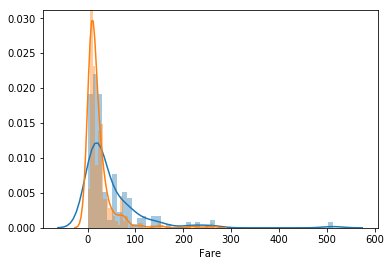

In [66]:
sns.distplot(df["Fare"][(df["Fare"].notnull())&(df["Survived"]==1)],bins=50)
sns.distplot(df["Fare"][(df["Fare"].notnull())&(df["Survived"]==0)],bins=50)

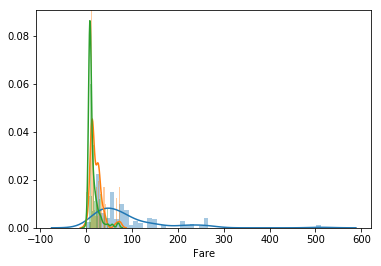

In [73]:
sns.distplot(df["Fare"][(df["Fare"].notnull())&(df["Pclass"]==1)],bins=50)
sns.distplot(df["Fare"][(df["Fare"].notnull())&(df["Pclass"]==2)],bins=50)
sns.distplot(df["Fare"][(df["Fare"].notnull())&(df["Pclass"]==3)],bins=50)

#### Age

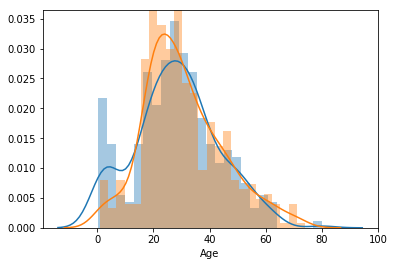

In [77]:
sns.distplot(df["Age"][(df["Age"].notnull())&(df["Survived"]==1)],bins=25)
sns.distplot(df["Age"][(df["Age"].notnull())&(df["Survived"]==0)],bins=25)

#### SibSp, Parch, Embarked

In [16]:
df.groupby("Embarked").size()

Embarked
C    270
Q    123
S    916
dtype: int64

In [17]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [83]:
features=["SibSp","Parch","Embarked"]

In [84]:
d={}
for f in features:
    temp=df.groupby(["Survived",f]).size()
    d[f]=pd.concat([temp[0],temp[1]],axis=1).fillna(0)

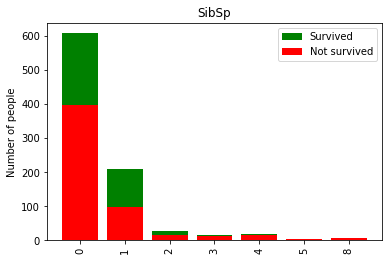

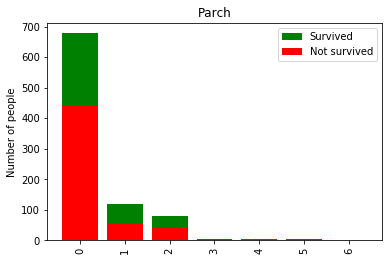

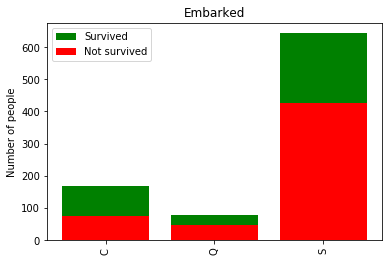

In [85]:
for f in features:
    plt.bar(np.arange(len(d[f][1])),d[f][1],bottom=d[f][0],label="Survived",color="g")
    plt.bar(np.arange(len(d[f][0])),d[f][0],label="Not survived",color="r")
    plt.xticks(np.arange(len(d[f][0])),d[f].index.values,rotation=90)
    plt.ylabel("Number of people")
    plt.title(f)
    plt.legend()
    plt.show()
    

### Filling missing values

#### Age

Text(0.5,1,'Not Survived')

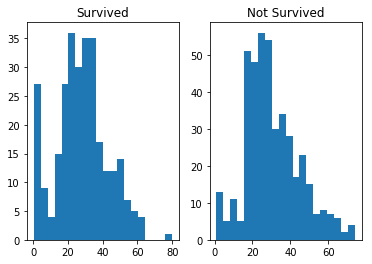

In [19]:
plt.subplot(1,2,1)
plt.hist(df["Age"][(df["Age"].notnull())&(df["Survived"]==1)],bins=20)
plt.title("Survived")

plt.subplot(1,2,2)
plt.hist(df["Age"][(df["Age"].notnull())&(df["Survived"]==0)],bins=20)
plt.title("Not Survived")

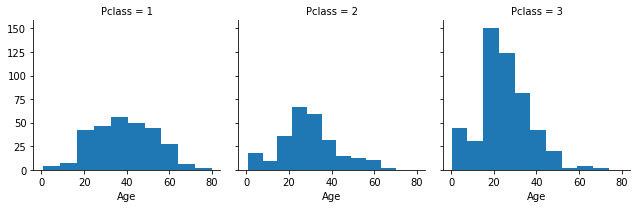

In [20]:
g=sns.FacetGrid(df[df["Age"].notnull()],col="Pclass").map(plt.hist,"Age")

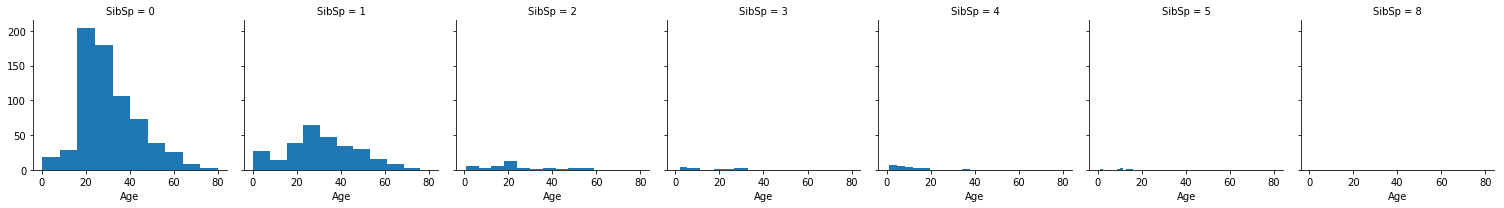

In [21]:
g=sns.FacetGrid(df[df["Age"].notnull()],col="SibSp").map(plt.hist,"Age")

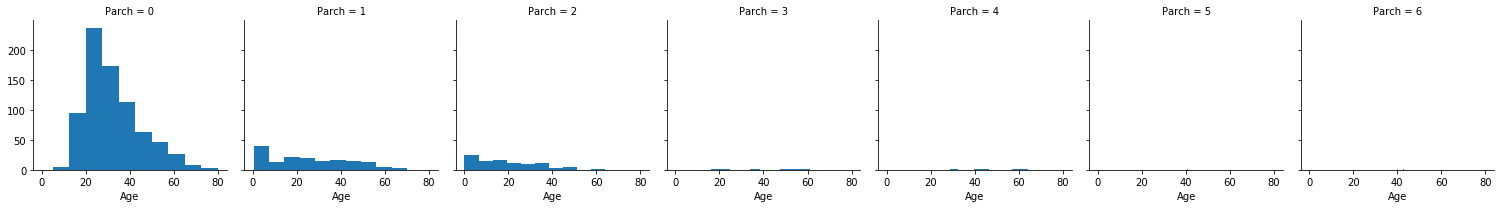

In [22]:
g=sns.FacetGrid(df[df["Age"].notnull()],col="Parch").map(plt.hist,"Age")

In [23]:
index_age=df[df["Age"].isnull()].index.values
median=df["Age"][df["Age"].notnull()].median()
for i in index_age: 
    Pclass,Parch,SibSp=df.loc[i,"Pclass"],df.loc[i,"Parch"],df.loc[i,"SibSp"]
    subset=df["Age"][(df["Pclass"]==Pclass)&(df["Parch"]==Parch)&(df["SibSp"]==SibSp)]
    if subset.any():
        median_s=int(subset.median())
        df.loc[i,"Age"]=median_s
    else:
        df.loc[i,"Age"]=median   

### Feature engineering

In [5]:
def find_deck(cabin):
    try:
        match=re.search(r'[A-Z]',str(cabin))
        return match.group()
    except AttributeError:
        return 0

In [6]:
def survivors_ticket(index):
    ticketnr=df.loc[index,"Ticket"]
    temp=df[df["Ticket"]==ticketnr]
    if index<=890:
        survived=temp["Survived"].sum()-df.loc[index,"Survived"]
    else:
        survived=temp["Survived"].sum()
    if survived == 0:
        return 0
    if survived >0:
        return 1

In [7]:
def find_title(name):
    match=re.search(r",\s[A-Za-z]+",str(name))
    return match.group()[2:]

In [8]:
def family_size(size):
    if size==0:
        return "Single"
    if (size>=1) & (size<=3):
        return "Small"
    if size>=4:
        return "Large"

In [ ]:
df["Deck"]=df["Cabin"].apply(find_deck)    
df["SurvivorsTicket"]=pd.Series(df.index).apply(survivors_ticket)
df["DeckKnown"]=df["Deck"].apply(lambda x: 1 if x else 0)
df["Title"]=df["Name"].apply(find_title)
df["Title"]=df["Title"].replace(["Capt","Col","Don","Dr","Jonkheer","Lady","Major",
                                 "Mlle","Mme","Ms","Rev","Sir","the","Dona"],"rare")
df["Size"]=df["SibSp"]+df["Parch"]
df["FSize"]=df["Size"].apply(family_size)

### Drop features and get dummies

In [236]:
df.drop(labels=["Name","PassengerId","Ticket","Cabin","FareGroup","AgeGroup","Deck","Embarked",\
               "SibSp","Parch"],axis=1,inplace=True)

In [238]:
df=pd.get_dummies(df,columns=["Pclass","FSize","Title"])

In [239]:
df.head()

,Age,Fare,Sex,Survived,SurvivorsTicket,DeckKnown,Size,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,FSize_Large,FSize_Single,FSize_Small,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_rare
0,22.0,7.2500,1,0.0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,38.0,71.2833,0,1.0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,26.0,7.9250,0,1.0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,35.0,53.1000,0,1.0,0,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,35.0,8.0500,1,0.0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


### Machine learning

In [240]:
X_full=df.drop(labels=["Survived"],axis=1)[:len(train)]
y_full=df["Survived"][:len(train)]
test=df.drop(labels=["Survived"],axis=1)[len(train):]

In [243]:
kfold=StratifiedKFold(n_splits=10)

In [244]:
tree=DecisionTreeClassifier()
svm=SVC()
adaboost=AdaBoostClassifier()
rf=RandomForestClassifier()
neigh=KNeighborsClassifier()
nb=GaussianNB()
xgb=XGBClassifier()
logr=LogisticRegression()

In [245]:
classifiers=[tree,svm,adaboost,rf,neigh,nb,xgb,logr]

In [246]:
outcomes={}
names=[]
mean_accuracy=[]
std=[]
for c in classifiers:
    outcomes[c]=cross_val_score(c,X_full,y_full,cv=kfold,scoring="accuracy",verbose=1)
    names.append(c.__class__.__name__)
    mean_accuracy.append(outcomes[c].mean())
    std.append(outcomes[c].std())
    

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [247]:
clf_results=pd.DataFrame({"Classifier":names,"Mean accuracy":mean_accuracy,"Standard Deviation":std})

In [248]:
clf_results

,Classifier,Mean accuracy,Standard Deviation
0,DecisionTreeClassifier,0.800245,0.046570
1,SVC,0.747674,0.040626
2,AdaBoostClassifier,0.825015,0.026011
3,RandomForestClassifier,0.823817,0.035107
4,KNeighborsClassifier,0.729671,0.033110
5,GaussianNB,0.802579,0.028428
6,XGBClassifier,0.845140,0.040647
7,LogisticRegression,0.833967,0.029226


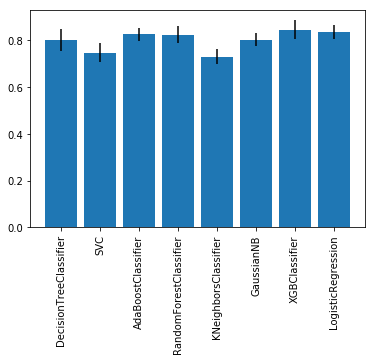

In [249]:
plt.bar(np.arange(len(clf_results)),clf_results["Mean accuracy"],yerr=clf_results["Standard Deviation"])
plt.xticks(np.arange(len(clf_results)),clf_results["Classifier"],rotation=90)
plt.show()

### Parameter tuning

In [250]:
tuning_results={}

In [251]:
def do_tune(clf_single,parameters,name):
    clf=GridSearchCV(clf_single,parameters,cv=kfold,scoring="accuracy",verbose=1,n_jobs=-1)
    clf.fit(X_full,y_full)
    tuning_results[name]=[clf.best_score_,clf.best_params_,clf.best_estimator_]
    return

In [252]:
parameters_AB={"learning_rate":[0.1,0.2,0.4,1],"n_estimators":[50],"base_estimator":[DecisionTreeClassifier()],"algorithm":\
              ["SAMME","SAMME.R"]}
parameters_RF = {"max_depth": [None],"max_features": [1, 3, 10],"min_samples_split": [2, 3, 10],"min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],"n_estimators" :[100,300],"criterion": ["gini"]}
parameters_logr={"C":[0.001,0.01,0.1,1,10,100,1000]}
parameters_xgb={"max_depth":[3,5,7,9,11,13,17,20],"learning_rate":[0.01,0.1]}


In [253]:
do_tune(adaboost,parameters_AB,"adaboost")
do_tune(rf,parameters_RF,"rf")
do_tune(logr,parameters_logr,"logr")
do_tune(xgb,parameters_xgb,"xgb")

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.3s finished


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.2min finished


Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  55 out of  70 | elapsed:   27.5s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   27.5s finished


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   12.8s finished


In [254]:
results,keys,clf_best=[],[],[]
for k in tuning_results.keys():
    keys.append(k)
    results.append(tuning_results[k][0])   
    clf_best.append(tuning_results[k][2])

In [255]:
pd.DataFrame({"name":keys,"tuned accuracy":results})

,name,tuned accuracy
0,xgb,0.845118
1,rf,0.840629
2,logr,0.833895
3,adaboost,0.818182


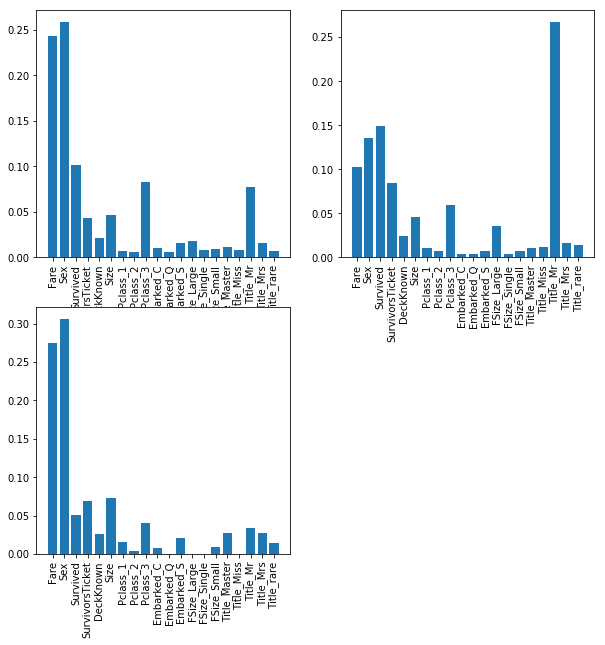

In [256]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.bar(np.arange(len(df.columns)-1),tuning_results["adaboost"][2].feature_importances_)
plt.xticks(np.arange(len(df.columns)-1),df.columns[1:],rotation=90)
plt.subplot(2,2,2)
plt.bar(np.arange(len(df.columns)-1),tuning_results["rf"][2].feature_importances_)
plt.xticks(np.arange(len(df.columns)-1),df.columns[1:],rotation=90)
plt.subplot(2,2,3)
plt.bar(np.arange(len(df.columns)-1),tuning_results["xgb"][2].feature_importances_)
plt.xticks(np.arange(len(df.columns)-1),df.columns[1:],rotation=90)
plt.show()

In [169]:
clf_best

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
        max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
        n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1),
 RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features=10, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', 

In [261]:
pred_xgb=clf_best[0].predict(test)
pred_rf=clf_best[1].predict(test)
pred_logr=clf_best[2].predict(test)
pred_ab=clf_best[3].predict(test)

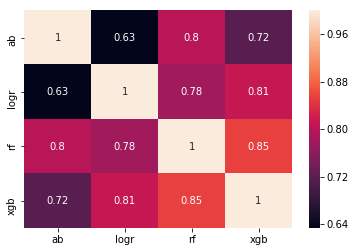

In [265]:
sns.heatmap(pd.DataFrame({"xgb":pred_xgb,"rf":pred_rf,"logr":pred_logr,"ab":pred_ab}).corr(),annot=True)

### Output

In [292]:
submission=pd.concat([testId,pd.Series(pred_xgb).astype(int)],axis=1)

In [293]:
submission.columns=["PassengerId","Survived"]

In [294]:
submission.to_csv("SecondSubmission.csv",index=False)